In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
pd.set_option('display.max_columns', None)

In [129]:
df_info = pd.read_csv('./matches_info_4_4.csv')
df_meta = pd.read_csv('./matches_meta_4_4.csv')

In [130]:
df_info

,matchId,t1Dragons,t2Dragons,t1Rift,t2Rift,topGoldDiff,jgGoldDiff,midGoldDiff,adcGoldDiff,suppGoldDiff,t1TopTowerTaken,t1MidTowerTaken,t1BotTowerTaken,t2TopTowerTaken,t2MidTowerTaken,t2BotTowerTaken
0,NA1_4246867983,2,0,0,0,2336,-1008,1383,731,683,0,0,0,1,0,0
1,NA1_4249810674,1,1,0,1,936,1694,216,1817,2023,0,0,0,0,0,1
2,NA1_4260329763,0,2,0,1,-846,-1472,-5485,-2755,-339,1,2,2,0,0,0
3,NA1_4253638363,0,1,1,0,1312,397,1266,486,874,0,0,0,1,0,0
4,NA1_4259164367,0,1,0,1,-1981,2913,-114,83,-226,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9185,NA1_4246789556,1,0,1,0,491,1887,1663,338,-28,0,0,0,0,1,0
9186,NA1_4249555996,1,1,1,0,-1025,-687,-585,2254,1499,0,0,0,0,0,0
9187,NA1_4237760651,1,0,0,0,-802,517,2370,844,1218,0,0,0,0,0,0
9188,NA1_4240516599,1,1,0,1,-1174,737,1692,1366,635,0,0,0,0,0,0


In [131]:
df_meta

,matchId,gameLength,winningTeam,team1Top,team1Jg,team1Mid,team1Adc,team1Supp,team2Top,team2Jg,team2Mid,team2Adc,team2Supp
0,NA1_4246867983,1752,100,Gangplank,Zac,Zed,Ashe,Leona,Jax,Khazix,Ekko,Lucian,Nautilus
1,NA1_4249810674,925,100,Gnar,Khazix,Vex,Ezreal,Brand,Yorick,Udyr,Yone,Ziggs,Pantheon
2,NA1_4260329763,911,200,Fiora,Rengar,Viktor,Kaisa,Galio,Teemo,Diana,Graves,Zeri,Pyke
3,NA1_4253638363,2800,200,Tryndamere,Ezreal,Varus,LeeSin,Karma,Graves,Volibear,Corki,Jinx,Lux
4,NA1_4259164367,2189,200,Cassiopeia,Nocturne,Xerath,Zeri,Nami,Volibear,Kayn,Akshan,Ezreal,Seraphine
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10035,NA1_4236288905,1955,200,Graves,Elise,Irelia,Jinx,Pantheon,Malphite,Qiyana,Neeko,Senna,Brand
10036,NA1_4251548861,1325,100,Jayce,Sejuani,Veigar,Vayne,Sona,Darius,JarvanIV,Orianna,Samira,Rell
10037,NA1_4237149072,1645,200,Yone,FiddleSticks,Zed,Kaisa,Yuumi,Malphite,Graves,Anivia,Caitlyn,Nautilus
10038,NA1_4244122702,2255,200,Chogath,Diana,Yone,Ezreal,Janna,Shen,JarvanIV,Vex,Jinx,Nautilus


In [132]:
df_match = pd.merge(df_info, df_meta, how='inner', on='matchId')

## Limpieza de valores nulos y duplicados

In [133]:
nulldf = pd.DataFrame()
for col in df_match.columns:
    row  = pd.DataFrame({
        'col' : [col]
        , 'count_nulls' : [sum(pd.isnull(df_match[col]))]
    })
    nulldf = pd.concat([nulldf, row])
nulldf

,col,count_nulls
0,matchId,0
0,t1Dragons,0
0,t2Dragons,0
0,t1Rift,0
0,t2Rift,0
0,topGoldDiff,0
0,jgGoldDiff,0
0,midGoldDiff,0
0,adcGoldDiff,0
0,suppGoldDiff,0


In [134]:
df_match.duplicated().sum()

1844

In [135]:
df_match.drop_duplicates(inplace=True)
df_match.dropna(inplace=True)
df_match

,matchId,t1Dragons,t2Dragons,t1Rift,t2Rift,topGoldDiff,jgGoldDiff,midGoldDiff,adcGoldDiff,suppGoldDiff,t1TopTowerTaken,t1MidTowerTaken,t1BotTowerTaken,t2TopTowerTaken,t2MidTowerTaken,t2BotTowerTaken,gameLength,winningTeam,team1Top,team1Jg,team1Mid,team1Adc,team1Supp,team2Top,team2Jg,team2Mid,team2Adc,team2Supp
0,NA1_4246867983,2,0,0,0,2336,-1008,1383,731,683,0,0,0,1,0,0,1752,100,Gangplank,Zac,Zed,Ashe,Leona,Jax,Khazix,Ekko,Lucian,Nautilus
1,NA1_4249810674,1,1,0,1,936,1694,216,1817,2023,0,0,0,0,0,1,925,100,Gnar,Khazix,Vex,Ezreal,Brand,Yorick,Udyr,Yone,Ziggs,Pantheon
2,NA1_4260329763,0,2,0,1,-846,-1472,-5485,-2755,-339,1,2,2,0,0,0,911,200,Fiora,Rengar,Viktor,Kaisa,Galio,Teemo,Diana,Graves,Zeri,Pyke
3,NA1_4253638363,0,1,1,0,1312,397,1266,486,874,0,0,0,1,0,0,2800,200,Tryndamere,Ezreal,Varus,LeeSin,Karma,Graves,Volibear,Corki,Jinx,Lux
4,NA1_4259164367,0,1,0,1,-1981,2913,-114,83,-226,1,0,0,0,0,0,2189,200,Cassiopeia,Nocturne,Xerath,Zeri,Nami,Volibear,Kayn,Akshan,Ezreal,Seraphine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10025,NA1_4236288905,0,1,0,0,1960,-1514,22,-1898,-1426,0,0,0,0,0,0,1955,200,Graves,Elise,Irelia,Jinx,Pantheon,Malphite,Qiyana,Neeko,Senna,Brand
10027,NA1_4251548861,1,0,1,0,1959,-2388,1132,1479,1099,0,0,0,0,0,0,1325,100,Jayce,Sejuani,Veigar,Vayne,Sona,Darius,JarvanIV,Orianna,Samira,Rell
10029,NA1_4237149072,0,2,0,1,611,-1344,-271,-2548,-1434,0,1,1,0,0,0,1645,200,Yone,FiddleSticks,Zed,Kaisa,Yuumi,Malphite,Graves,Anivia,Caitlyn,Nautilus
10031,NA1_4244122702,0,1,0,1,-421,-1606,-1469,-189,-268,0,1,0,0,0,0,2255,200,Chogath,Diana,Yone,Ezreal,Janna,Shen,JarvanIV,Vex,Jinx,Nautilus


## Analisis de duracion de las partias

In [136]:
df_match['gameLength'] = df_match['gameLength']/60

In [137]:
df_match['gameLength'].describe()

count    8107.000000
mean       29.166362
std         6.487366
min         3.183333
25%        24.833333
50%        29.016667
75%        33.350000
max        55.833333
Name: gameLength, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x2284567b670>,
 'caps': [<matplotlib.lines.Line2D at 0x2284567ae30>,
 'boxes': [<matplotlib.lines.Line2D at 0x22845679330>],
 'medians': [<matplotlib.lines.Line2D at 0x22845679f00>],
 'fliers': [<matplotlib.lines.Line2D at 0x2284567a380>],
 'means': []}

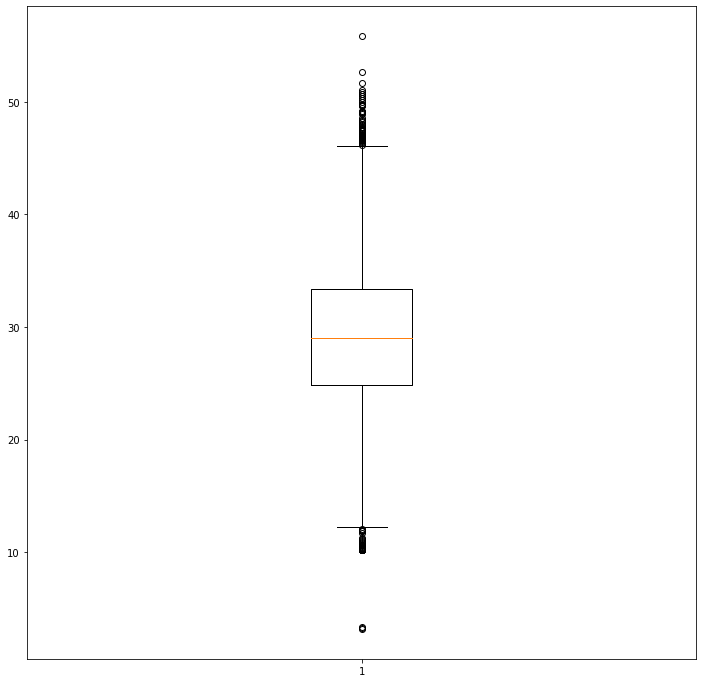

In [138]:
f, ax = plt.subplots(figsize =(12, 12))
plt.boxplot(df_match['gameLength'])


<AxesSubplot:>

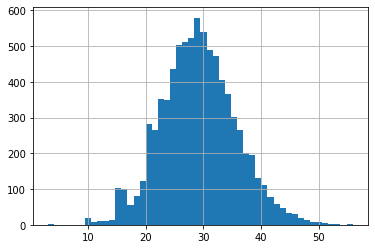

In [139]:
df_match['gameLength'].hist(bins=50)

In [140]:
df_match = df_match.loc[df_match['gameLength'] > 4]

([<matplotlib.axis.XTick at 0x2284d8914b0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

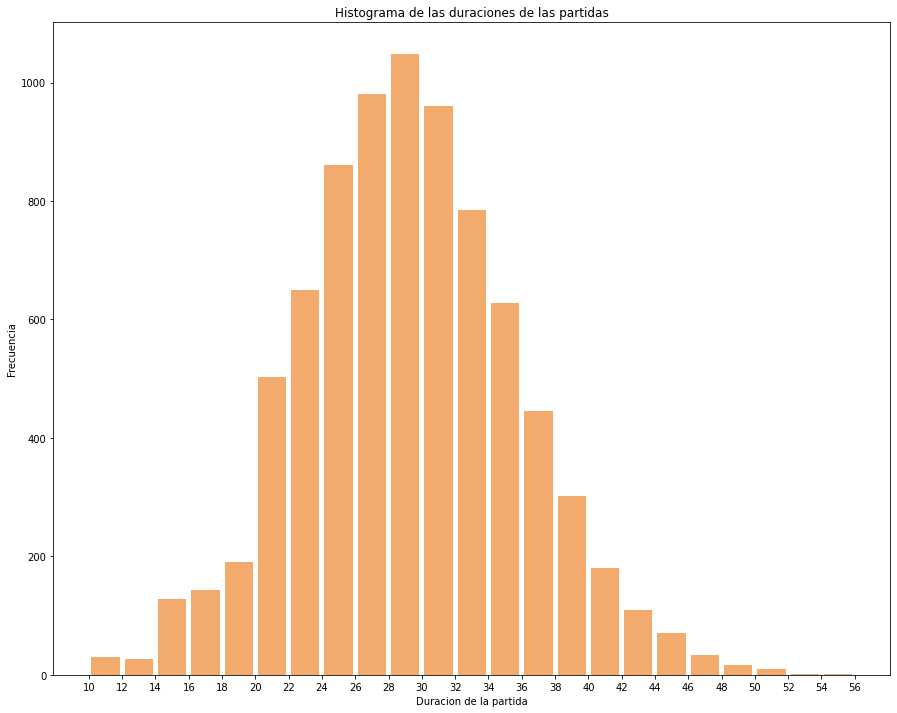

In [141]:
data = df_match['gameLength']

intervalos = range(int(min(data)), int(max(data) + 2),2) #calculamos los extremos de los intervalos
f, ax = plt.subplots(figsize =(15, 12))
plt.hist(x=data, bins=intervalos, color='#F2AB6D', rwidth=0.85)
plt.title('Histograma de las duraciones de las partidas')
plt.xlabel('Duracion de la partida')
plt.ylabel('Frecuencia')
plt.xticks(intervalos)

In [142]:
df_match['gameLength'].describe()

count    8104.000000
mean       29.175942
std         6.469427
min        10.200000
25%        24.833333
50%        29.016667
75%        33.350000
max        55.833333
Name: gameLength, dtype: float64

## Analisis de Winrate por lado

In [143]:
data

0        29.200000
1        15.416667
2        15.183333
3        46.666667
4        36.483333
           ...    
10025    32.583333
10027    22.083333
10029    27.416667
10031    37.583333
10033    36.616667
Name: gameLength, Length: 8104, dtype: float64

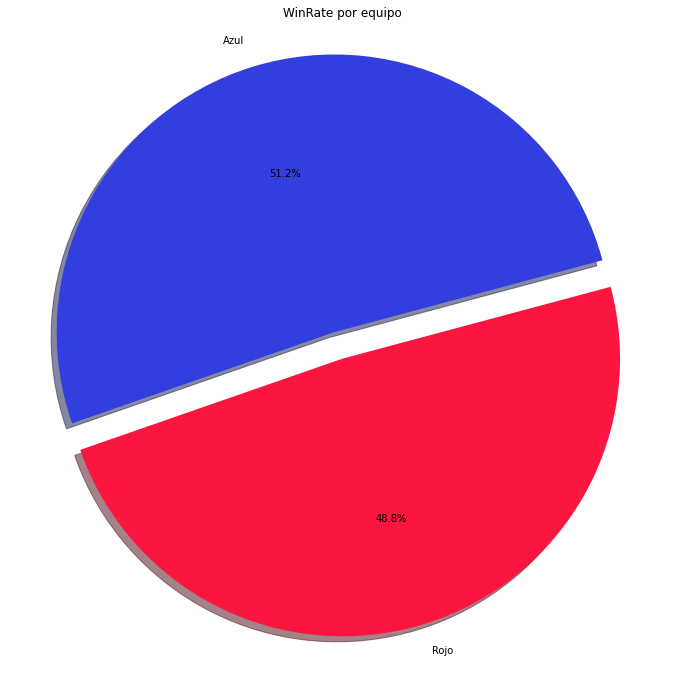

In [144]:
data = (df_match.loc[:,['winningTeam','matchId']].groupby('winningTeam').count() / df_match.shape[0]*100 )['matchId']

f, ax = plt.subplots(figsize =(12, 12))
my_labels = 'Azul', 'Rojo'
my_colors = ['#323EDD','#FA163F']
my_explode = (0.1, 0)
plt.pie(data, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('WinRate por equipo')
plt.axis('equal')
plt.show()

## Analisis de diferencia de oro por rol

In [145]:
df_match.loc[:,['topGoldDiff','jgGoldDiff', 'midGoldDiff', 'adcGoldDiff', 'suppGoldDiff']].describe()

,topGoldDiff,jgGoldDiff,midGoldDiff,adcGoldDiff,suppGoldDiff
count,8104.000000,8104.000000,8104.000000,8104.000000,8104.000000
mean,35.029245,-29.323050,-4.733095,2.728282,8.290474
std,1670.783471,1305.896233,1397.227373,1543.195977,1061.495927
min,-5784.000000,-4670.000000,-5737.000000,-7044.000000,-4429.000000
25%,-1080.250000,-888.250000,-913.000000,-976.000000,-651.250000
50%,18.000000,-30.500000,-2.500000,8.000000,0.000000
75%,1116.250000,834.000000,888.000000,994.250000,679.000000
max,7142.000000,5198.000000,7113.000000,6580.000000,4780.000000


In [146]:
lanes = ['topGoldDiff','jgGoldDiff', 'midGoldDiff', 'adcGoldDiff', 'suppGoldDiff']
red_team = pd.DataFrame()
blue_team = pd.DataFrame()
none = pd.DataFrame()
for lane in lanes:
  red_team[lane]=df_match.loc[df_match[lane]<0,[lane]]
  blue_team[lane]=df_match.loc[df_match[lane]>0,[lane]]

([<matplotlib.axis.XTick at 0x2284dafcdf0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

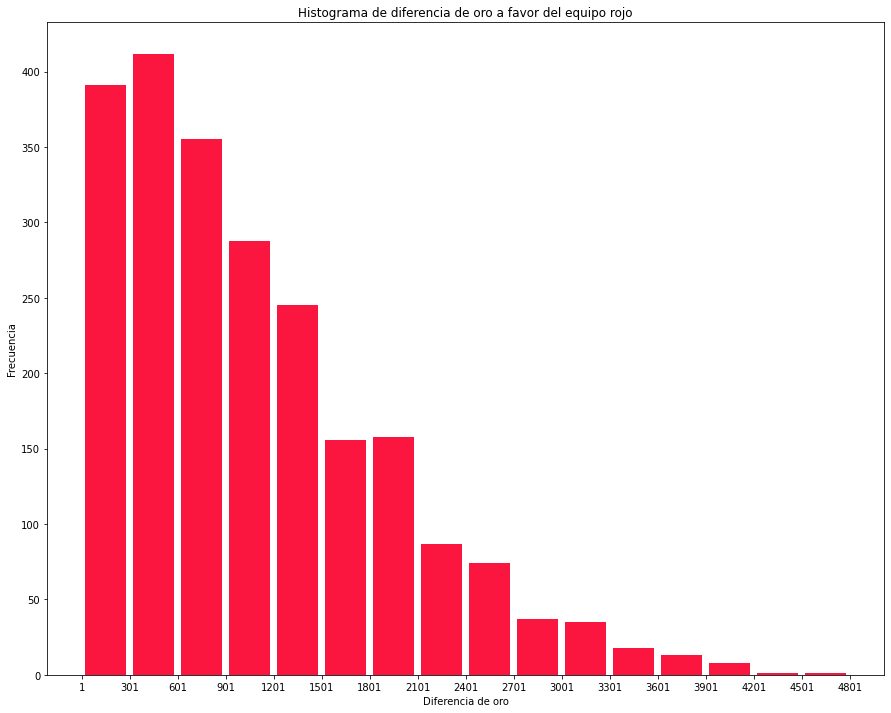

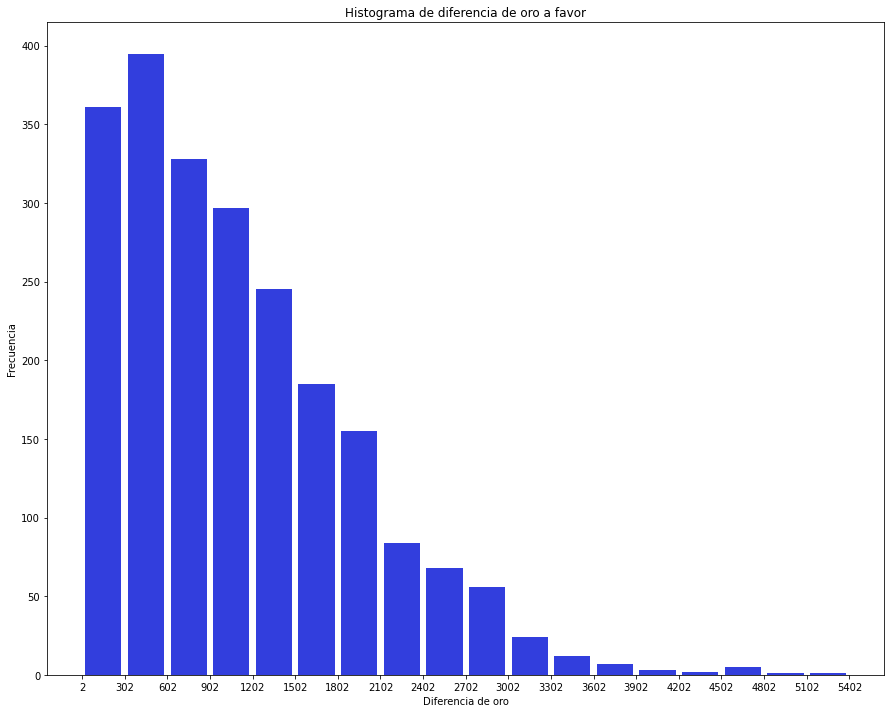

In [147]:
data = red_team['jgGoldDiff'].agg(abs).dropna()

intervalos = range(int(min(data)), int(max(data) + 300),300) #calculamos los extremos de los intervalos
f, ax = plt.subplots(figsize =(15, 12))
plt.hist(x=data, bins=intervalos, color='#FA163F', rwidth=0.85)
plt.title('Histograma de diferencia de oro a favor del equipo rojo')
plt.xlabel('Diferencia de oro')
plt.ylabel('Frecuencia')
plt.xticks(intervalos)

data = blue_team['jgGoldDiff'].agg(abs).dropna()

intervalos = range(int(min(data)), int(max(data) + 300),300) #calculamos los extremos de los intervalos
f, ax = plt.subplots(figsize =(15, 12))
plt.hist(x=data, bins=intervalos, color='#323EDD', rwidth=0.85)
plt.title('Histograma de diferencia de oro a favor')
plt.xlabel('Diferencia de oro')
plt.ylabel('Frecuencia')
plt.xticks(intervalos)

([<matplotlib.axis.XTick at 0x2284e560760>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

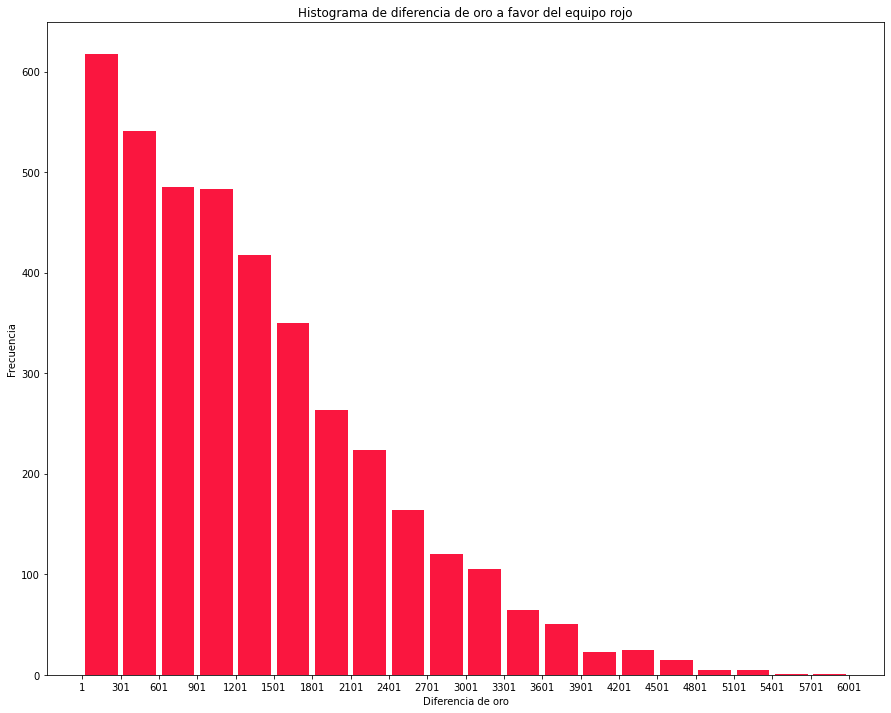

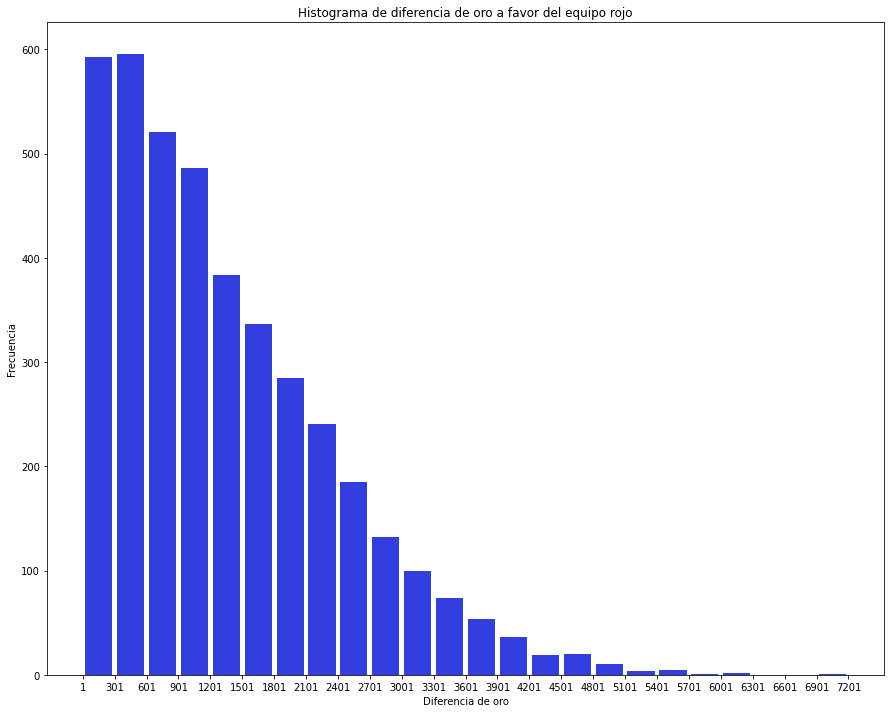

In [148]:
data = red_team['topGoldDiff'].agg(abs)

intervalos = range(int(min(data)), int(max(data) + 300),300) #calculamos los extremos de los intervalos
f, ax = plt.subplots(figsize =(15, 12))
plt.hist(x=data, bins=intervalos, color='#FA163F', rwidth=0.85)
plt.title('Histograma de diferencia de oro a favor del equipo rojo')
plt.xlabel('Diferencia de oro')
plt.ylabel('Frecuencia')
plt.xticks(intervalos)


data = blue_team['topGoldDiff'].agg(abs)

intervalos = range(int(min(data)), int(max(data) + 300),300) #calculamos los extremos de los intervalos
f, ax = plt.subplots(figsize =(15, 12))
plt.hist(x=data, bins=intervalos, color='#323EDD', rwidth=0.85)
plt.title('Histograma de diferencia de oro a favor del equipo rojo')
plt.xlabel('Diferencia de oro')
plt.ylabel('Frecuencia')
plt.xticks(intervalos)

([<matplotlib.axis.XTick at 0x2284eec6f20>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

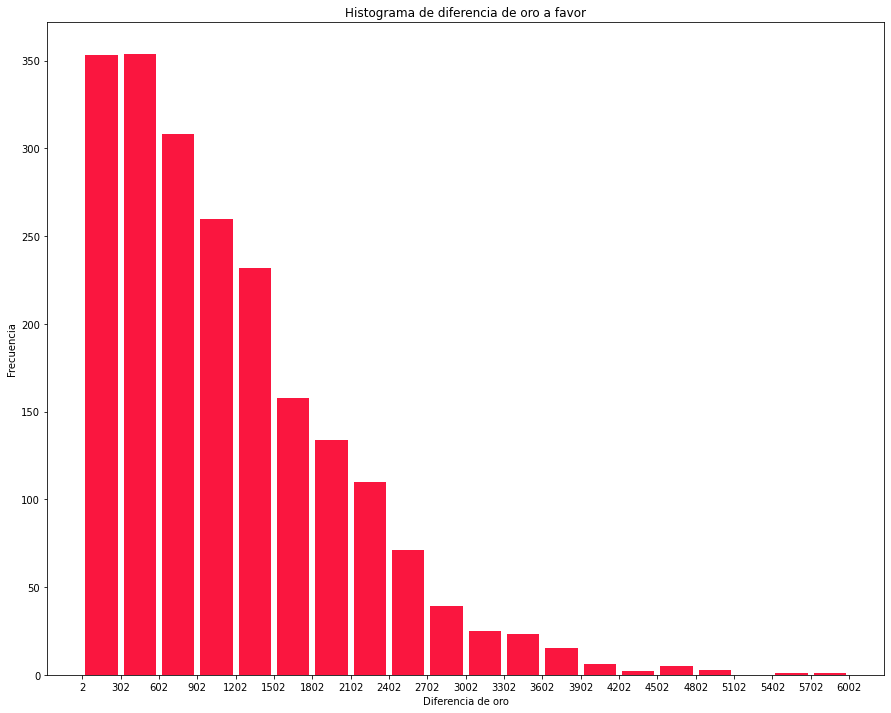

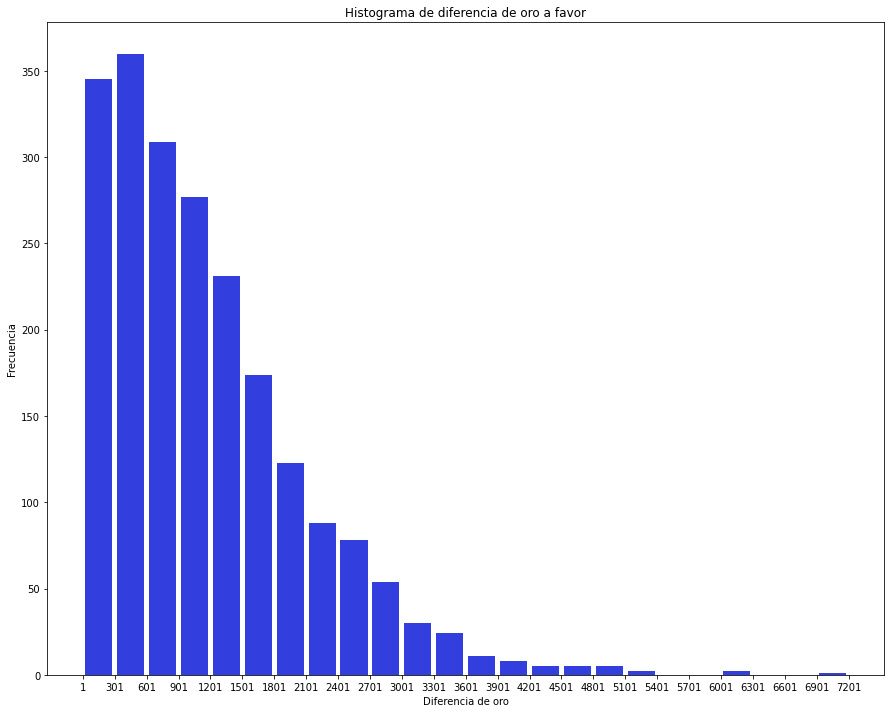

In [149]:
data = red_team['midGoldDiff'].agg(abs).dropna()

intervalos = range(int(min(data)), int(max(data) + 300),300) #calculamos los extremos de los intervalos
f, ax = plt.subplots(figsize =(15, 12))
plt.hist(x=data, bins=intervalos, color='#FA163F', rwidth=0.85)
plt.title('Histograma de diferencia de oro a favor')
plt.xlabel('Diferencia de oro')
plt.ylabel('Frecuencia')
plt.xticks(intervalos)

data = blue_team['midGoldDiff'].agg(abs).dropna()

intervalos = range(int(min(data)), int(max(data) + 300),300) #calculamos los extremos de los intervalos
f, ax = plt.subplots(figsize =(15, 12))
plt.hist(x=data, bins=intervalos, color='#323EDD', rwidth=0.85)
plt.title('Histograma de diferencia de oro a favor')
plt.xlabel('Diferencia de oro')
plt.ylabel('Frecuencia')
plt.xticks(intervalos)

([<matplotlib.axis.XTick at 0x2284f42bca0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

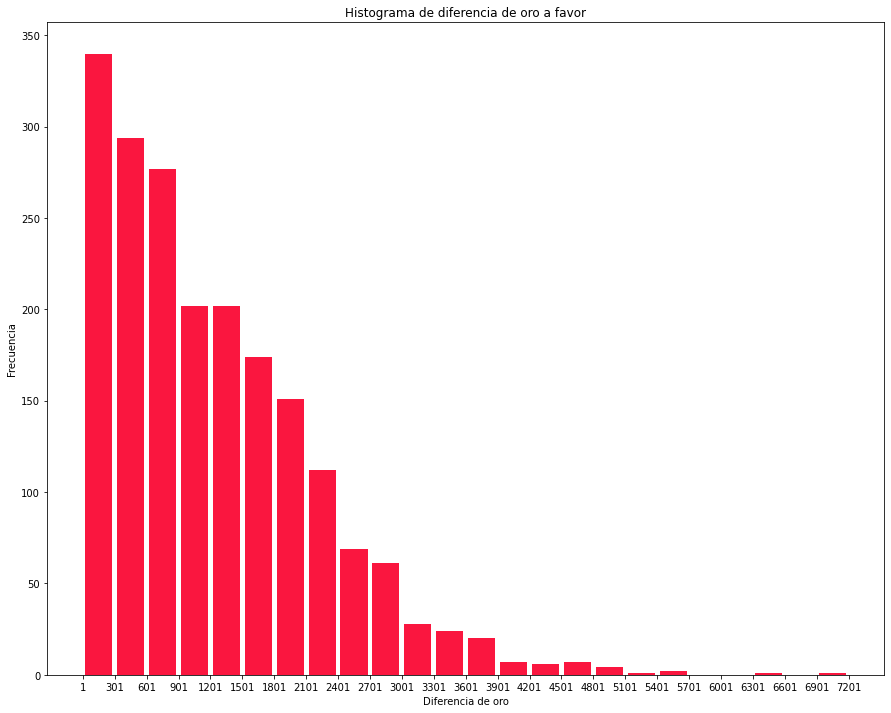

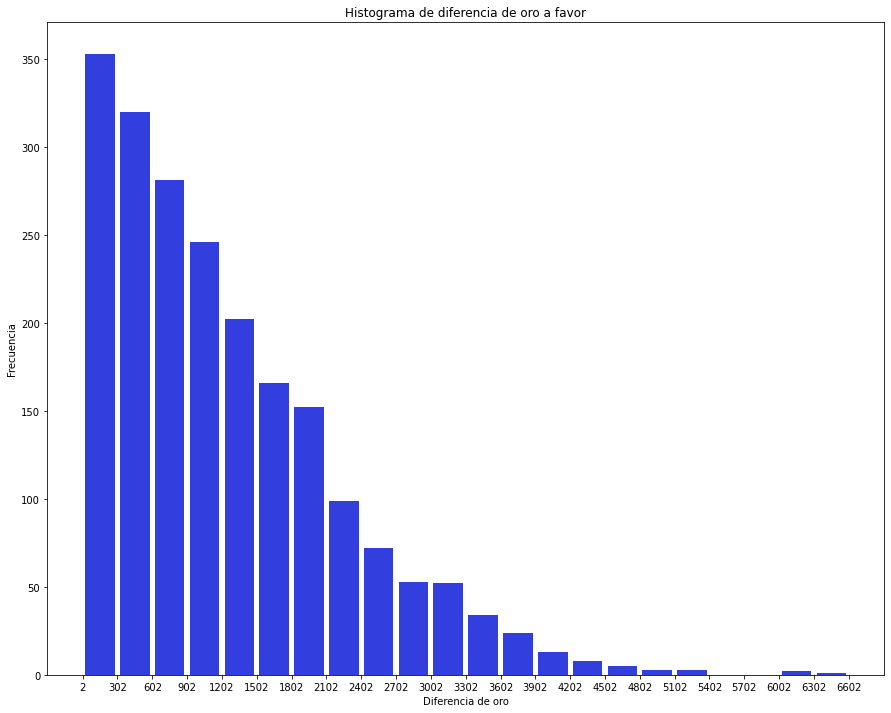

In [150]:
data = red_team['adcGoldDiff'].agg(abs).dropna()

intervalos = range(int(min(data)), int(max(data) + 300),300) #calculamos los extremos de los intervalos
f, ax = plt.subplots(figsize =(15, 12))
plt.hist(x=data, bins=intervalos, color='#FA163F', rwidth=0.85)
plt.title('Histograma de diferencia de oro a favor')
plt.xlabel('Diferencia de oro')
plt.ylabel('Frecuencia')
plt.xticks(intervalos)

data = blue_team['adcGoldDiff'].agg(abs).dropna()

intervalos = range(int(min(data)), int(max(data) + 300),300) #calculamos los extremos de los intervalos
f, ax = plt.subplots(figsize =(15, 12))
plt.hist(x=data, bins=intervalos, color='#323EDD', rwidth=0.85)
plt.title('Histograma de diferencia de oro a favor')
plt.xlabel('Diferencia de oro')
plt.ylabel('Frecuencia')
plt.xticks(intervalos)

([<matplotlib.axis.XTick at 0x2284f5a40d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

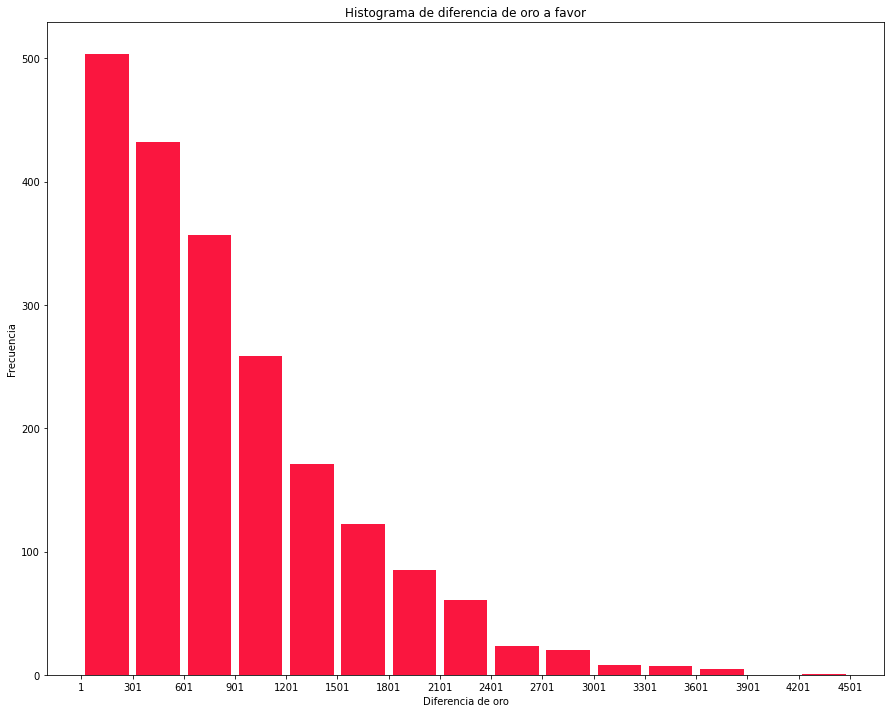

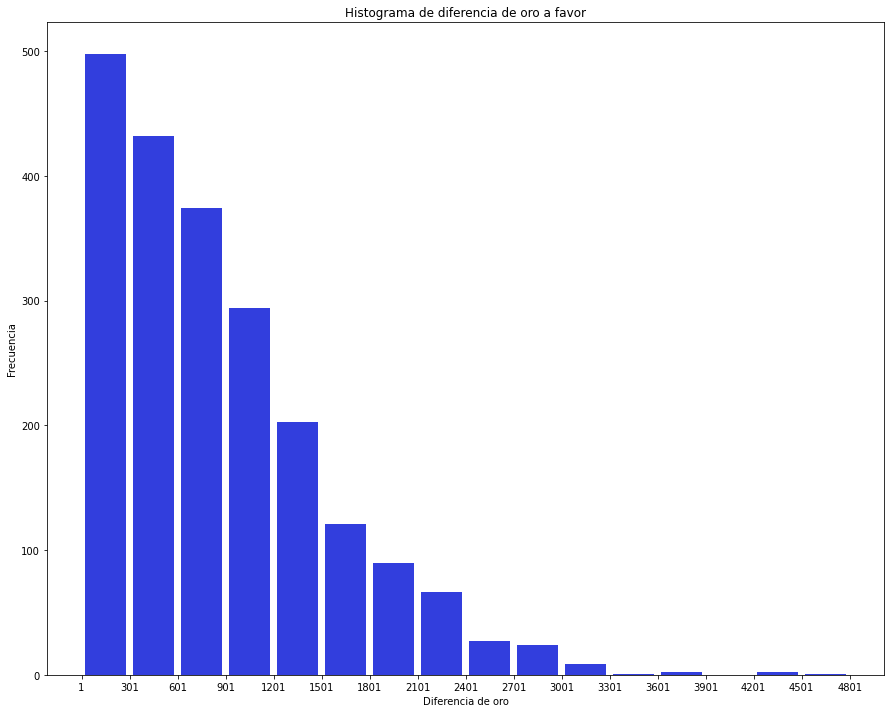

In [151]:
data = red_team['suppGoldDiff'].agg(abs).dropna()

intervalos = range(int(min(data)), int(max(data) + 300),300) 
f, ax = plt.subplots(figsize =(15, 12))
plt.hist(x=data, bins=intervalos, color='#FA163F', rwidth=0.85)
plt.title('Histograma de diferencia de oro a favor')
plt.xlabel('Diferencia de oro')
plt.ylabel('Frecuencia')
plt.xticks(intervalos)

data = blue_team['suppGoldDiff'].agg(abs).dropna()

intervalos = range(int(min(data)), int(max(data) + 300),300) 
f, ax = plt.subplots(figsize =(15, 12))
plt.hist(x=data, bins=intervalos, color='#323EDD', rwidth=0.85)
plt.title('Histograma de diferencia de oro a favor')
plt.xlabel('Diferencia de oro')
plt.ylabel('Frecuencia')
plt.xticks(intervalos)

In [152]:
red_team.mean()

topGoldDiff    -1310.880838
jgGoldDiff     -1077.326898
midGoldDiff    -1135.316190
adcGoldDiff    -1226.035804
suppGoldDiff    -839.081265
dtype: float64

In [153]:
blue_team.mean()

topGoldDiff     1340.253549
jgGoldDiff      1095.242710
midGoldDiff     1160.319887
adcGoldDiff     1242.543801
suppGoldDiff     854.664646
dtype: float64

In [154]:
red_team = red_team.describe()

In [155]:
blue_team = blue_team.describe()

In [156]:
blue_team

,topGoldDiff,jgGoldDiff,midGoldDiff,adcGoldDiff,suppGoldDiff
count,4086.000000,2229.000000,2132.000000,2089.000000,2144.000000
mean,1340.253549,1095.242710,1160.319887,1242.543801,854.664646
std,1044.322972,822.749316,921.754890,998.972336,680.934681
min,1.000000,2.000000,1.000000,2.000000,1.000000
25%,501.000000,449.000000,472.000000,467.000000,327.500000
50%,1107.000000,929.000000,955.500000,1021.000000,692.500000
75%,1930.000000,1559.000000,1628.000000,1800.000000,1215.000000
max,7142.000000,5198.000000,7113.000000,6580.000000,4780.000000


In [157]:
red_team = red_team.loc['count',:]
blue_team = blue_team.loc['count',:]

In [158]:
diference = blue_team - red_team
diference

topGoldDiff     125.0
jgGoldDiff      -50.0
midGoldDiff      32.0
adcGoldDiff     106.0
suppGoldDiff     89.0
Name: count, dtype: float64

In [159]:
diference = pd.DataFrame(diference)
diference['count']= np.where(diference['count']>0, 'blue' , 'red')
diference.rename(columns={'count':'team'}, inplace=True)
diference

,team
topGoldDiff,blue
jgGoldDiff,red
midGoldDiff,blue
adcGoldDiff,blue
suppGoldDiff,blue


## Campeones con mas y menos WR por linea

In [173]:
championsTop = pd.DataFrame(df_match['team1Top'].unique())
championsSupp = pd.DataFrame(df_match['team1Supp'].unique())
championsAdc = pd.DataFrame(df_match['team1Adc'].unique())
championsJg = pd.DataFrame(df_match['team1Jg'].unique())
championsMid = pd.DataFrame(df_match['team1Mid'].unique())

champions = pd.merge(championsTop, championsSupp, how='outer', on=0)
champions = pd.merge(champions, championsAdc, how='outer', on=0)
champions = pd.merge(champions, championsJg, how='outer', on=0)
champions = pd.merge(champions, championsMid, how='outer', on=0)
champions.rename(columns={0:'name'}, inplace=True)
champions.shape[0]

159

In [179]:
for champ in champions['name'].to_list():
  numberOfGames = df_match.loc[(df_match['team1Top']==champ) | (df_match['team2Top']==champ)].count()[0]
  champions.loc[champions['name']==champ,'TopWr'] = (df_match.loc[((df_match['team1Top']==champ) & (df_match['winningTeam']==100))| ((df_match['team2Top']==champ) & (df_match['winningTeam']==200))].count()[0]/numberOfGames*100)if numberOfGames>50 else 0
  
  numberOfGames = df_match.loc[(df_match['team1Jg']==champ) | (df_match['team2Jg']==champ)].count()[0]
  champions.loc[champions['name']==champ,'JgWr'] = (df_match.loc[((df_match['team1Jg']==champ) & (df_match['winningTeam']==100))| ((df_match['team2Jg']==champ) & (df_match['winningTeam']==200))].count()[0]/numberOfGames*100)if numberOfGames>50 else 0
  numberOfGames = df_match.loc[(df_match['team1Mid']==champ) | (df_match['team2Mid']==champ)].count()[0]
  champions.loc[champions['name']==champ,'MidWr'] = (df_match.loc[((df_match['team1Mid']==champ) & (df_match['winningTeam']==100))| ((df_match['team2Mid']==champ) & (df_match['winningTeam']==200))].count()[0]/numberOfGames*100)if numberOfGames>50 else 0
  numberOfGames = df_match.loc[(df_match['team1Adc']==champ) | (df_match['team2Adc']==champ)].count()[0]
  champions.loc[champions['name']==champ,'AdcWr'] = (df_match.loc[((df_match['team1Adc']==champ) & (df_match['winningTeam']==100))| ((df_match['team2Adc']==champ) & (df_match['winningTeam']==200))].count()[0]/numberOfGames*100)if numberOfGames>50 else 0
  numberOfGames = df_match.loc[(df_match['team1Supp']==champ) | (df_match['team2Supp']==champ)].count()[0]
  champions.loc[champions['name']==champ,'SuppWr'] = (df_match.loc[((df_match['team1Supp']==champ) & (df_match['winningTeam']==100))| ((df_match['team2Supp']==champ) & (df_match['winningTeam']==200))].count()[0]/numberOfGames*100)if numberOfGames>50 else 0



In [180]:
champions

,name,TopWr,JgWr,MidWr,AdcWr,SuppWr
0,Gangplank,51.044084,0.000000,41.111111,0.000000,0.0
1,Gnar,45.275591,0.000000,0.000000,0.000000,0.0
2,Fiora,49.298597,0.000000,0.000000,0.000000,0.0
3,Tryndamere,55.369128,0.000000,54.166667,0.000000,0.0
4,Cassiopeia,0.000000,0.000000,47.468354,0.000000,0.0
...,...,...,...,...,...,...
154,Syndra,0.000000,0.000000,39.719626,0.000000,0.0
155,Ziggs,0.000000,0.000000,49.350649,44.217687,0.0
156,Ivern,0.000000,59.259259,0.000000,0.000000,0.0
157,Evelynn,0.000000,55.203620,0.000000,0.000000,0.0


### TOP

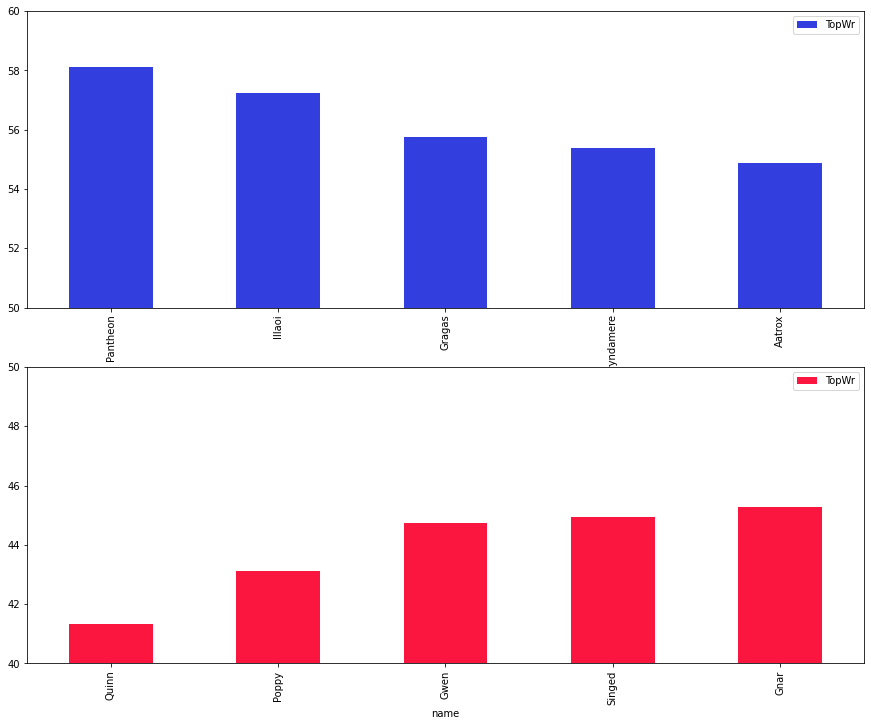

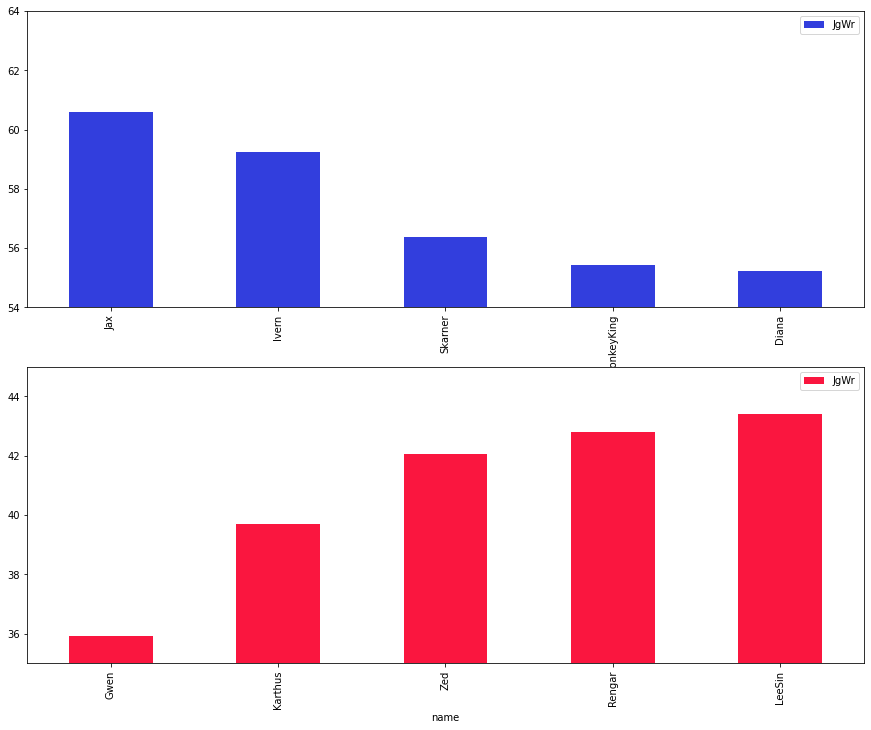

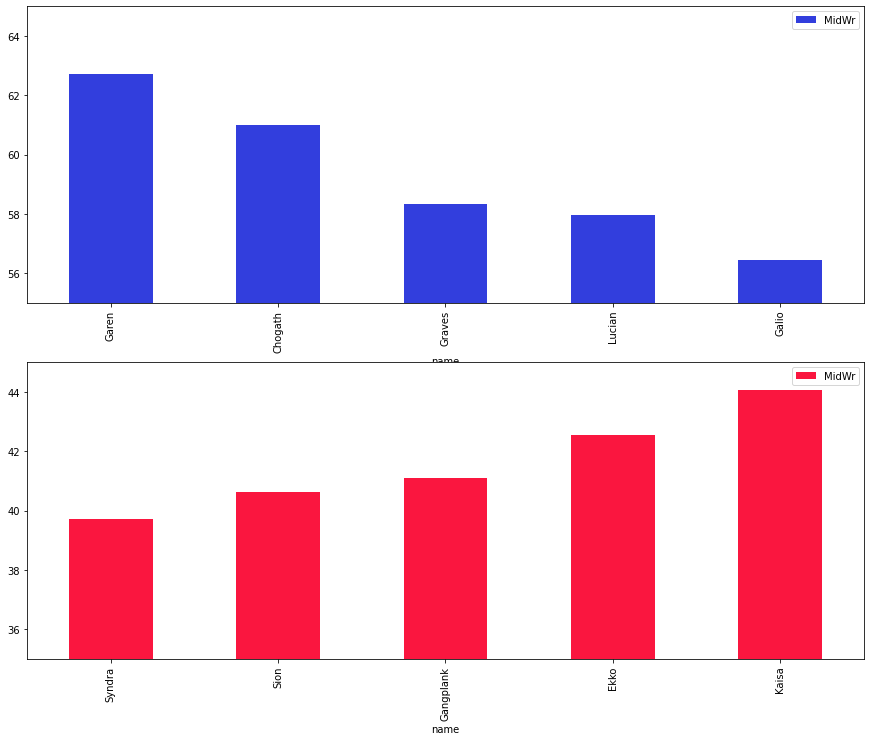

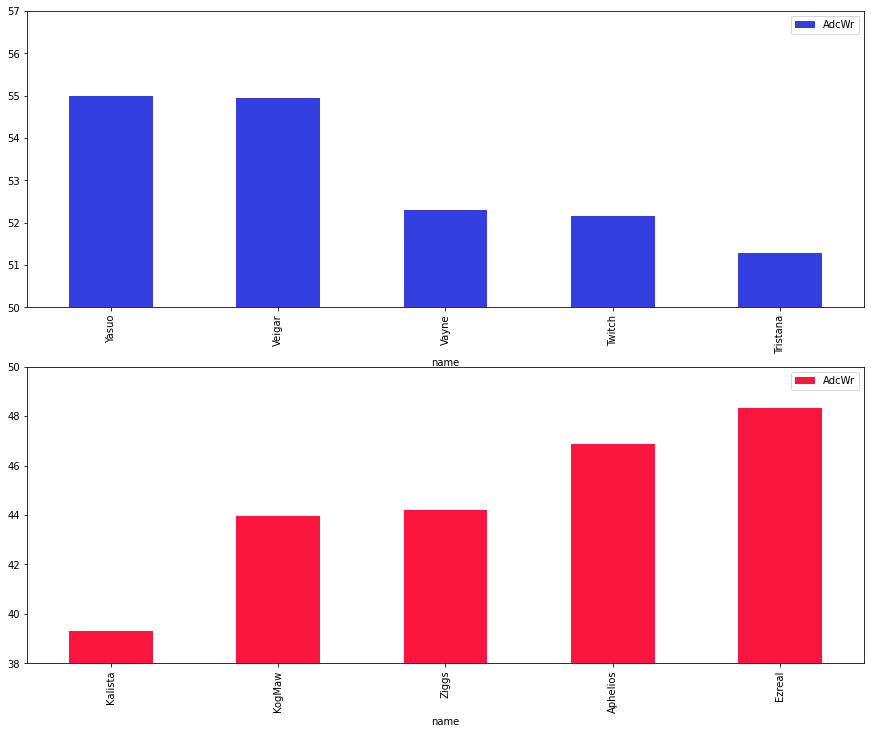

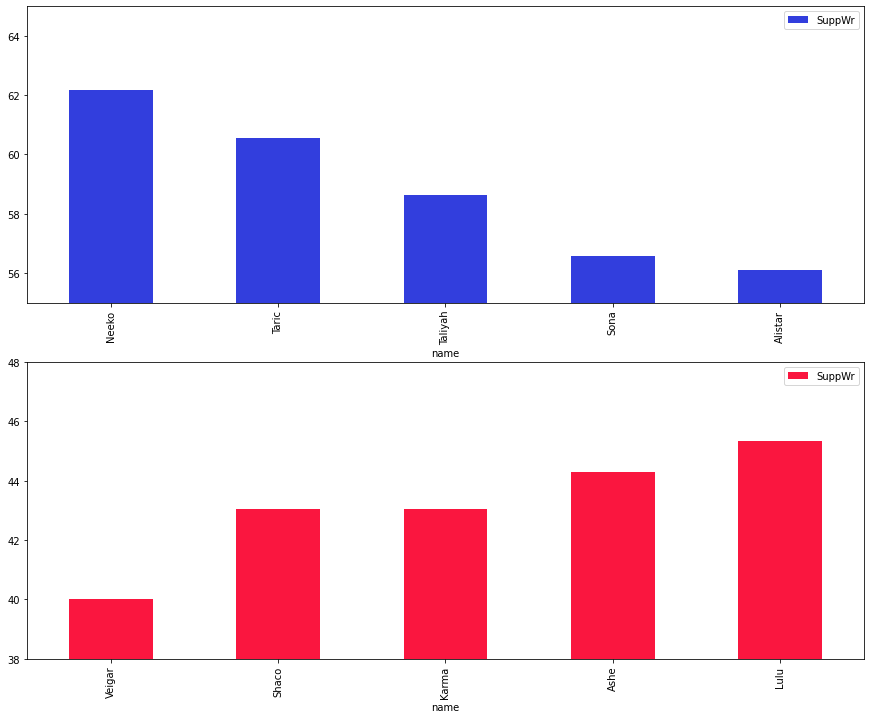

In [203]:
#TOP
most = champions.loc[:,['name','TopWr']].sort_values('TopWr',ascending=False).head(5)
less = champions.loc[champions['TopWr']>1,['name','TopWr']].sort_values('TopWr',ascending=True).head(5)


f, ax = plt.subplots(2,1, figsize =(15, 12))
most.plot(x ='name', y='TopWr', kind = 'bar', ylim=(50,60), color = '#323EDD', ax= ax[0])
less.plot(x ='name', y='TopWr', kind = 'bar', ylim=(40,50), color = '#FA163F', ax = ax[1])

plt.show()

#JG
most = champions.loc[:,['name','JgWr']].sort_values('JgWr',ascending=False).head(5)
less = champions.loc[champions['JgWr']>1,['name','JgWr']].sort_values('JgWr',ascending=True).head(5)



f, ax = plt.subplots(2,1, figsize =(15, 12))
most.plot(x ='name', y='JgWr', kind = 'bar', ylim=(54,64), color = '#323EDD', ax= ax[0])
less.plot(x ='name', y='JgWr', kind = 'bar', ylim=(35,45), color = '#FA163F', ax = ax[1])
plt.show()

#MID
most = champions.loc[:,['name','MidWr']].sort_values('MidWr',ascending=False).head(5)
less = champions.loc[champions['MidWr']>1,['name','MidWr']].sort_values('MidWr',ascending=True).head(5)

f, ax = plt.subplots(2,1, figsize =(15, 12))
most.plot(x ='name', y='MidWr', kind = 'bar', ylim=(55,65), color = '#323EDD', ax= ax[0])
less.plot(x ='name', y='MidWr', kind = 'bar', ylim=(35,45), color = '#FA163F', ax = ax[1])
plt.show()

#ADC
most = champions.loc[:,['name','AdcWr']].sort_values('AdcWr',ascending=False).head(5)
less = champions.loc[champions['AdcWr']>1,['name','AdcWr']].sort_values('AdcWr',ascending=True).head(5)

f, ax = plt.subplots(2,1, figsize =(15, 12))
most.plot(x ='name', y='AdcWr', kind = 'bar', ylim=(50,57), color = '#323EDD', ax= ax[0])
less.plot(x ='name', y='AdcWr', kind = 'bar', ylim=(38,50), color = '#FA163F', ax = ax[1])
plt.show()

#SUPP
most = champions.loc[:,['name','SuppWr']].sort_values('SuppWr',ascending=False).head(5)
less = champions.loc[champions['SuppWr']>1,['name','SuppWr']].sort_values('SuppWr',ascending=True).head(5)

f, ax = plt.subplots(2,1, figsize =(15, 12))
most.plot(x ='name', y='SuppWr', kind = 'bar', ylim=(55,65), color = '#323EDD', ax= ax[0])
less.plot(x ='name', y='SuppWr', kind = 'bar', ylim=(38,48), color = '#FA163F', ax = ax[1])
plt.show()
